## Object Classification using Neural Network

In [105]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import h5py
import scipy.io
import matplotlib.patches as patches
from PIL import Image  
from skimage import color
from tqdm import tqdm_notebook as tqdm

In [106]:
PATH = "101_ObjectCategories/"

In [107]:
# required classes for this assigment
classes = ["accordion", "airplanes", "bass", "bonsai", "brain", "buddha", "butterfly", "camera", "cannon", "car_side"]

In [108]:
# checking number of images of each class in classes
for i in classes:
    for path, directories, images in os.walk(PATH + i):
        print(len(images))

55
800
54
128
98
85
91
50
43
123


Note that second last class (cannon) doesn't have 50 images

In [109]:
# reading those images and storing them in an array
img = []
img_class = []
img_name = []
# Reading only 50 image from each class

# for i in classes:
#     for path, directories, images in os.walk(PATH + i):
#         for image in images:
#             img.append(np.array(cv2.imread(PATH + i + "/" + image)))
#             img_class.append(i)
#             img_name.append(image)


for i in classes:
    for j in range(1, 51):
        if i == "cannon" and j>= 44:
            break
        # we have to add zeroes before j 
        l = len(str(j))
        zeroes_req = 4 - l
        add_zeroes = zeroes_req * "0"
        img.append(np.array(cv2.imread(PATH + i + "/" + "image_" + add_zeroes + str(j) + ".jpg")))
        img_class.append(i)
        img_name.append("image_" + add_zeroes + str(j) + ".jpg")

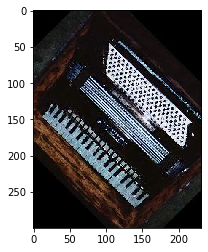

In [110]:
plt.imshow(img[1])

In [111]:
img[1].dtype

dtype('uint8')

In [112]:
img = np.array(img)

In [113]:
len(img)

493

In [114]:
img /= 255

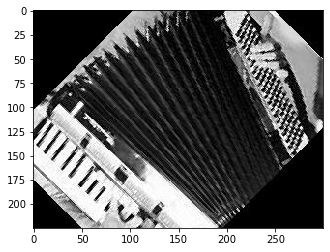

In [115]:
plt.imshow(img[6])

In [116]:
img[1].dtype

dtype('float64')

* changing images dtype because of overflow issues etc. issues when using uint8

### Checking how to use annotations and few plots of annotation data on images

In [117]:
# reading annotation files and checking how to use that file
# f = h5py.File("Annotations/" + "accordion/" + "annotation_0001.mat",'r')
f = scipy.io.loadmat("Annotations/" + "accordion/" + "annotation_0041.mat")
data = f.get('data/variable1')
data = np.array(data) # For converti

In [118]:
f

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Dec 14 16:26:04 2004',
 '__version__': '1.0',
 '__globals__': [],
 'box_coord': array([[  1, 235,   6, 289]], dtype=uint16),
 'obj_contour': array([[  0.88157895,  11.18859649,  16.13596491,  42.52192982,
          71.38157895,  99.00438596, 213.20614035, 282.46929825,
         273.81140351, 241.24122807, 229.28508772, 209.49561404,
         186.82017544, 156.31140351, 131.98684211, 106.01315789,
          54.47807018,   0.46929825,   1.70614035,   1.70614035],
        [161.49561404, 140.05701754, 110.78508772,  66.25877193,
          27.91666667,   1.94298246,   1.94298246, 116.14473684,
         130.98684211, 158.60964912, 178.81140351, 209.73245614,
         212.61842105, 211.38157895, 235.70614035, 234.46929825,
         200.6622807 , 164.79385965, 160.67105263, 160.67105263]])}

In [119]:
box_coord = f['box_coord'][0]

In [120]:
temp = np.array(cv2.imread(PATH + "accordion/" + "image_0041.jpg"))

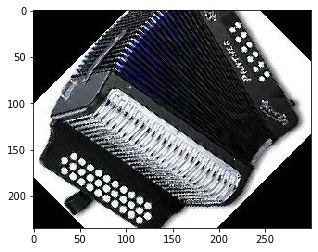

In [121]:
plt.imshow(temp)

In [122]:
temp.dtype

dtype('uint8')

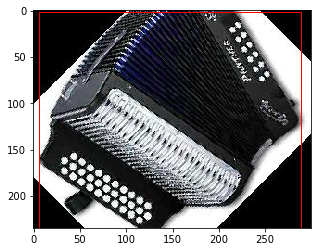

In [123]:
# plotting annotations box on an image (square with red boundaries)
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(temp)

# Create a Rectangle patch
rect = patches.Rectangle((box_coord[2],box_coord[0]),box_coord[3] - box_coord[2],box_coord[1] - box_coord[0],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [124]:
annotated_img = temp[box_coord[0]:box_coord[1], box_coord[2]:box_coord[3]]

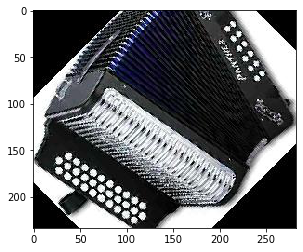

In [125]:
plt.imshow(annotated_img)

### Making a function for using annotation

In [128]:
def use_annotation(img, img_class, img_name):
    '''
    img: image, np array of all images
    img_class: class name, which gives the name of folder in which corresponding annotation file is stored
    img_name: corresponding annotaiton file name is related to image name
    returns cropped image in annotation box
    '''
    final_img = []
    for i, image in enumerate(img):
        # annotation files are in a folder named Annotation
        #image_name consists of image naming images_0001.jpg while corresponding annotation file is annotation_0001.mat
        annotation_file = "annotation_" + (img_name[i].split('_')[1]).split('.')[0] + ".mat"
        f = scipy.io.loadmat("Annotations/" + img_class[i] + "/" +annotation_file)
        data = f.get('data/variable1')
        data = np.array(data)
        box_coord = f['box_coord'][0]
        annotated_img = image[box_coord[0]:box_coord[1], box_coord[2]:box_coord[3]]
        final_img.append(annotated_img)
    return final_img

In [129]:
final_img = use_annotation(img, img_class, img_name)

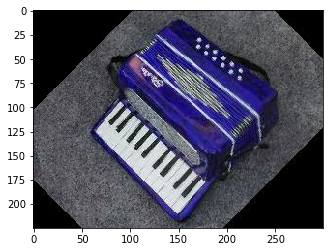

In [130]:
plt.imshow(img[9])

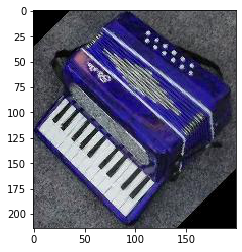

In [131]:
plt.imshow(final_img[9])

## Resizing image

In [132]:
# checking how resize function works
img = Image.open(PATH + "airplanes/" + "image_0001.jpg")
new_img = img.resize((50,50))
new_img.save("car_resized.jpg", "JPEG", optimize=True)

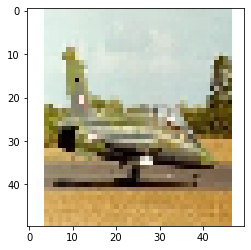

In [133]:
plt.imshow(new_img)

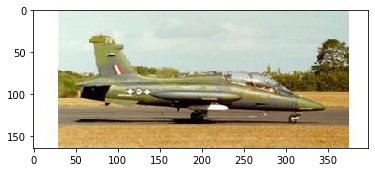

In [134]:
plt.imshow(img)

In [135]:
cropped_img = np.array(new_img)

In [136]:
cropped_img.shape

(50, 50, 3)

In [137]:
def crop_image(final_img):
    '''
    final_img: np array of all images
    takes an image and resize it to 50x50 size
    '''
    cropped_img = []
    for i in final_img:
        # instead of reading image again, we can use Image.fromarray
        temp = Image.fromarray(np.uint8(i*255), 'RGB')
        cropped = temp.resize((50,50))
        cropped_img.append(np.array(cropped))
    return cropped_img

In [138]:
cropped_img = crop_image(final_img)

In [139]:
final_img[0].dtype

dtype('float64')

In [140]:
cropped_img = np.array(cropped_img)

In [141]:
cropped_img.shape

(493, 50, 50, 3)

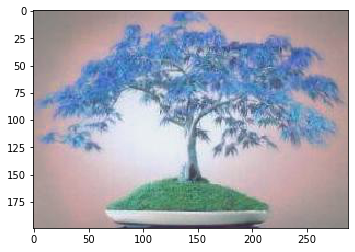

In [142]:
plt.imshow(final_img[172])

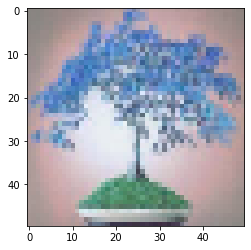

In [143]:
plt.imshow(cropped_img[172])

In [144]:
def gray_scale(img):
    '''
    img: np array, array of all the images
    converts an rgb image to greyscale image
    '''
    gray_images = []
    for i, image in enumerate(img):
#         temp = Image.fromarray(np.uint8(img[i]*255))
        gray_image = color.rgb2gray(image)
        gray_images.append(np.array(gray_image))
    return np.array(gray_images)
    

In [145]:
all_img = gray_scale(cropped_img)

In [146]:
all_img.shape

(493, 50, 50)

### Neural Network

First layer i.e. input layer is having 50*50 = 2500 nodes and hidden layer is having 2500/2 = 1250 nodes

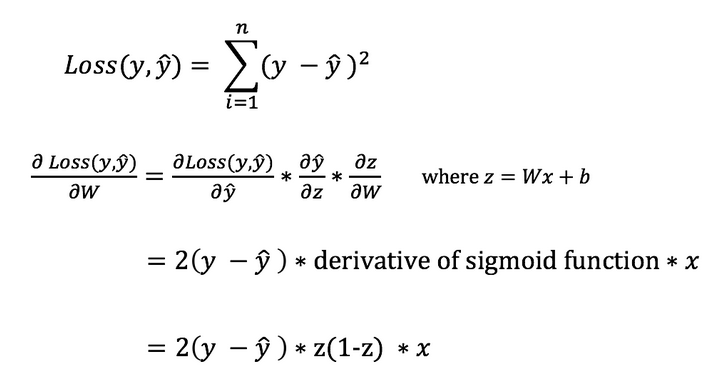

Neural Network class, can also use other activation functions like relu, multilayers are also supported with different number of nodes

In [181]:
class NeuralNet():
  
    def __init__(self, architecture):
        '''
        Initialising neural network according to given architecture
        '''
        self.architecture = architecture
        self.params = self._initialize_params(architecture)

    def _initialize_params(self, architecture):
        '''
        Initalizing prarmeters according to architecture intialized
        '''
        params = {}
        for id_, layer in enumerate(architecture):
            layer_id = id_ + 1

            input_dim = layer['input_dim']
            output_dim = layer['output_dim']

            params['W'+str(layer_id)] = np.random.randn(output_dim, input_dim)*0.1
            params['b'+str(layer_id)] = np.zeros((output_dim, 1))

        return params

    def sigmoid(self, Z):
        '''
        returns sigmoid value of Z
        '''
        return 1/(1+np.exp(-Z))
    def relu(self, Z):
        '''
        returns relu value of Z
        '''
        return np.maximum(0, Z)

    def sigmoid_backward(self, dA, z_curr):
        '''
        returns derivative of sigmoid(z_curr)
        '''
        sig = self.sigmoid(z_curr)
        return sig*(1-sig)*dA

    def relu_backward(self, dA, z_curr):
        '''
        returns derivative of relu(z_curr)
        '''
        dz = np.array(dA, copy=True)
        dz[z_curr<=0]=0
        return dz

    def _forward_prop_this_layer(self, A_prev, W_curr, b_curr, activation_function):
        '''
        Forward propagation of a particular layer
        '''
        z_curr = np.dot(W_curr, A_prev) + b_curr

        if activation_function is 'relu':
            activation = self.relu
        elif activation_function is 'sigmoid':
            activation = self.sigmoid
        else:
            raise Exception("{} is not supported, Only sigmoid, relu are supported"%(activation_function))

        return activation(z_curr), z_curr

    def _forward(self, X):
        '''
        Forward propagation for all layers
        '''
        cache = {}
        A_current = X
        for layer_id_prev, layer in enumerate(self.architecture):
            current_layer_id = layer_id_prev+1

            A_previous = A_current
            activation = layer['activation']

            W_curr = self.params['W'+str(current_layer_id)]
            b_curr = self.params['b'+str(current_layer_id)]

            A_current, Z_curr = self._forward_prop_this_layer(A_previous, W_curr,
                                                      b_curr, activation)

            cache['A'+str(layer_id_prev)] = A_previous
            cache['Z'+str(current_layer_id)] = Z_curr

        return A_current, cache

    def _criterion(self, y, yhat):
        '''
        Can also add more criterion here
        '''
        m = yhat.shape[1]
        cost = -1/m * (np.dot(y, np.log(yhat).T) + np.dot(1-y, np.log(1-yhat).T))
        return np.squeeze(cost)

    def _backprop_this_layer(self, da_curr, z_curr, W_curr, b_curr, A_prev, activation_function):
        '''
        Backpropgating on a layer
        '''
        if activation_function is 'sigmoid':
            activation_back = self.sigmoid_backward
        elif activation_function is 'relu':
            activation_back = self.relu_backward
        else:
            raise Exception('need sigmoid or relu')
        m = A_prev.shape[1]

        dz_curr = activation_back(da_curr, z_curr)
        dw_curr = np.dot(dz_curr, A_prev.T)/m
        db_curr = np.sum(dz_curr, axis=1, keepdims=True)/m
        da_prev = np.dot(W_curr.T, dz_curr)

        return da_prev, dw_curr, db_curr

    def _backward(self, ytrue, ypred, cache):
        grads = {}
        m = ytrue.shape[1]
        da_prev = np.divide(1-ytrue, 1-ypred) - np.divide(ytrue, ypred)

        for prev_layer_id, layer in reversed(list(enumerate(self.architecture))):
            layer_id = prev_layer_id + 1
            activation = layer['activation']

            da_curr = da_prev

            A_prev = cache['A'+str(prev_layer_id)]
            Z_curr = cache['Z'+str(layer_id)]

            W_curr = self.params['W'+str(layer_id)]
            b_curr = self.params['b'+str(layer_id)]

            da_prev, dw_curr, db_curr = self._backprop_this_layer(
              da_curr, Z_curr, W_curr, b_curr, A_prev, activation)

            grads["dw"+str(layer_id)] = dw_curr
            grads['db'+str(layer_id)] = db_curr

        return grads

    def update(self, grads, learning_rate):
        '''
        Updating weights of each layer in architecture
        '''
        for layer_id, layer in enumerate(self.architecture, 1):
            self.params['W'+str(layer_id)] -= learning_rate * grads['dw'+str(layer_id)]
            self.params['b'+str(layer_id)] -= learning_rate * grads['db'+str(layer_id)]

    def fit(self, X, y, epochs, learning_rate, verbose=True, show_loss=True):
        X, y = X.T, y.reshape((y.shape[0],-1)).T
        loss_history, accuracy_history = [], []
        for epoch in tqdm(range(epochs), total=epochs, unit='epoch'):
            yhat, cache = self._forward(X)
            loss = self._criterion(y, yhat)
            loss_history.append(loss)

            yacc = yhat.copy()
            yacc[yacc>0.5] = 1
            yacc[yacc<=0.5] = 0

            accuracy = np.sum(y[0]==yacc[0])/(yacc.shape[1])
            accuracy_history.append(accuracy)

            grads_values = self._backward(y, yhat, cache)

            self.update(grads_values, learning_rate)
            if(epoch % 1000 == 0):
                  if(verbose):
                        print("Epoch: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(epoch, loss, accuracy))


        fig = plt.figure(figsize=(12,10))
        plt.plot(range(epochs), loss_history, 'r-')
        plt.plot(range(epochs), accuracy_history, 'b--')
        plt.legend(['Training_loss', 'Training_Accuracy'])
        plt.xlabel('Epochs')
        plt.ylabel('Loss/Accuracy')
        plt.show()

    def predict(self, X):
        '''
        Binary classificaiton, if predicted image probability <= 0.5 
        predicts 0 therwise 1
        '''
        yhat, _ = self._forward(X)
        yhat[yhat>0.5]=1
        yhat[yhat<=0.5]=0
        return np.squeeze(yhat)
    def get_proba(self, X):
        '''
        returns predicted probabilities
        '''
        yhat, _ = self._forward(X)
        return yhat

In [182]:
NN_ARCHITECTURE = [
    {"input_dim": 2500, "output_dim": 1250, "activation": "sigmoid"},# First Hidden Layer
    {"input_dim": 1250, "output_dim": 1, "activation": "sigmoid"},# Output Layer
]

net = NeuralNet(NN_ARCHITECTURE)


Epoch: 00000 - cost: 0.49664 - accuracy: 0.78000
Epoch: 01000 - cost: 0.13421 - accuracy: 0.95000
Epoch: 02000 - cost: 0.09562 - accuracy: 0.98000
Epoch: 03000 - cost: 0.07477 - accuracy: 0.98500
Epoch: 04000 - cost: 0.06064 - accuracy: 0.99250
Epoch: 05000 - cost: 0.05017 - accuracy: 0.99250



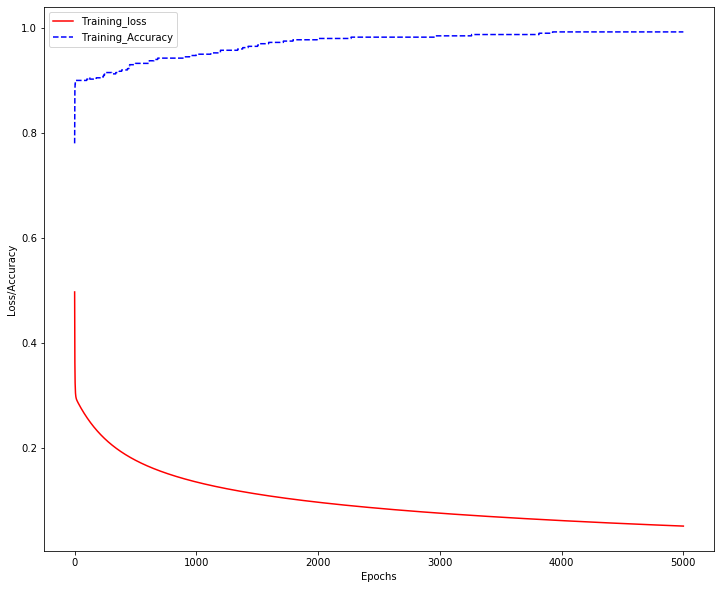

In [174]:
# checking neural network results
net.fit(x_train_flat, training_y, epochs=5001, learning_rate=3e-3, verbose=True, show_loss=True)

In [170]:
training_y.shape

(400,)

Neural Network is working fine.

### One Vs All classification

In [176]:
NN_ARCHITECTURE = [
    {"input_dim": 2500, "output_dim": 1250, "activation": "sigmoid"},# First Hidden Layer
    {"input_dim": 1250, "output_dim": 1, "activation": "sigmoid"},# Output Layer
]

Wall time: 0 ns
(400, 2500)


Epoch: 00000 - cost: 1.19112 - accuracy: 0.13750
Epoch: 01000 - cost: 0.13384 - accuracy: 0.95750



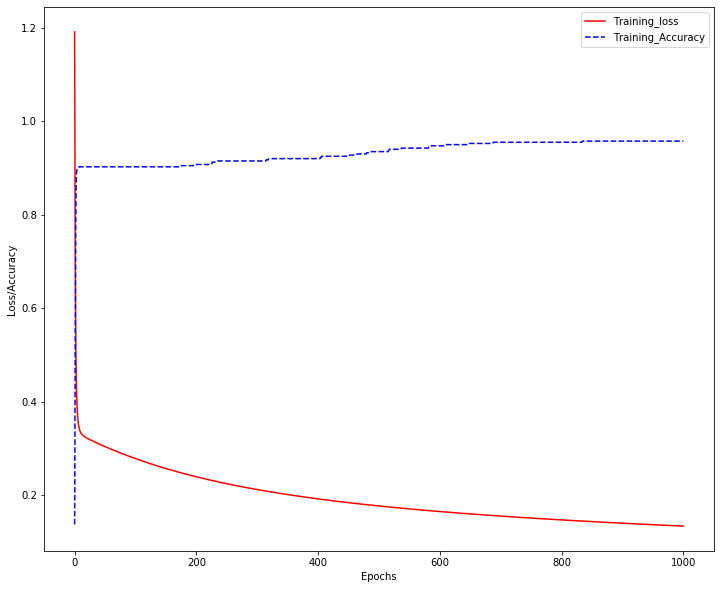

Epoch: 00000 - cost: 2.04713 - accuracy: 0.10000
Epoch: 01000 - cost: 0.19234 - accuracy: 0.93000



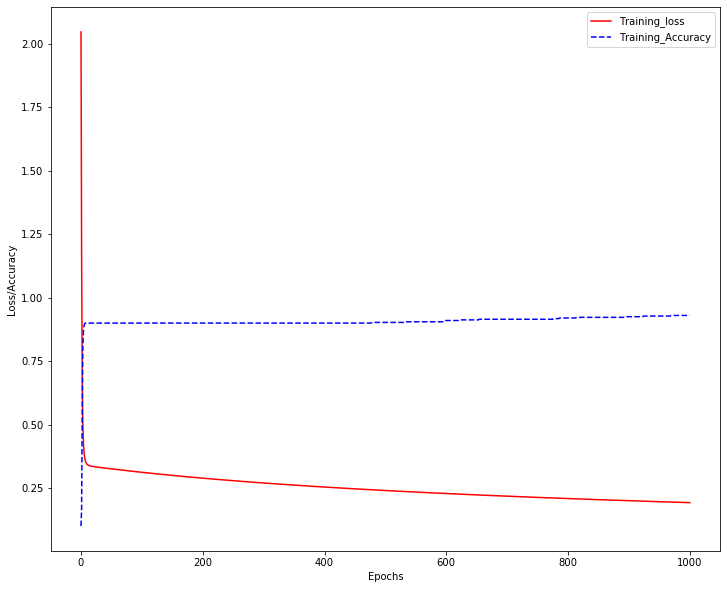

Epoch: 00000 - cost: 1.99066 - accuracy: 0.10000
Epoch: 01000 - cost: 0.22507 - accuracy: 0.91250



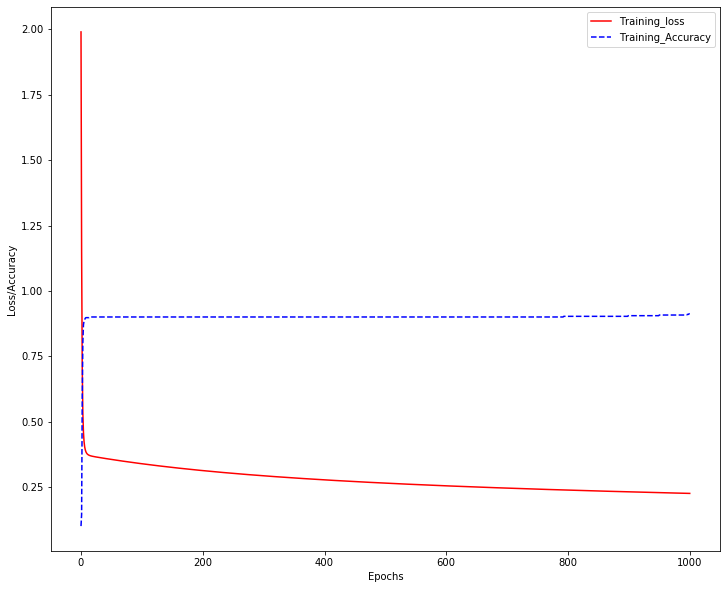

Epoch: 00000 - cost: 0.59695 - accuracy: 0.65250
Epoch: 01000 - cost: 0.22417 - accuracy: 0.91250



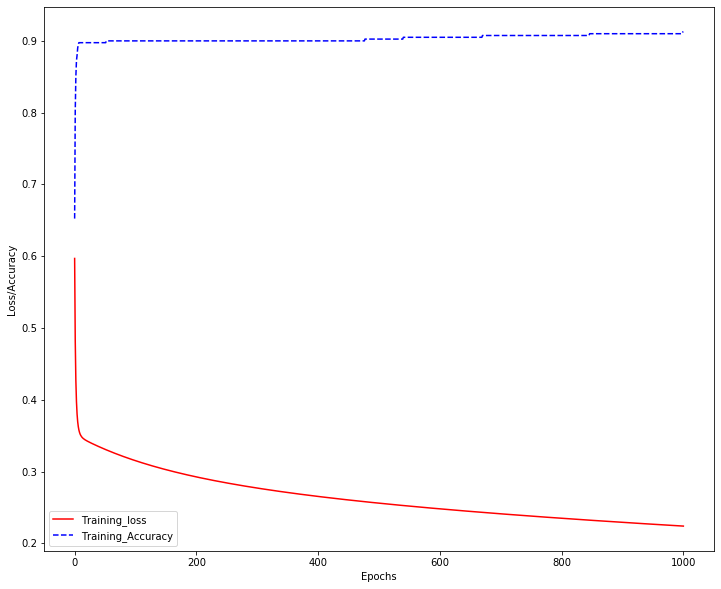

Epoch: 00000 - cost: 1.32423 - accuracy: 0.11750
Epoch: 01000 - cost: 0.19942 - accuracy: 0.93000



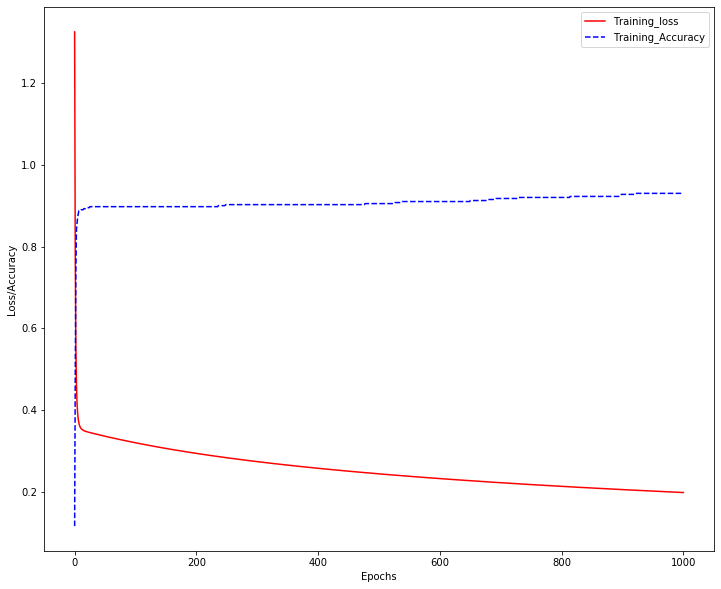

Epoch: 00000 - cost: 4.08093 - accuracy: 0.10000
Epoch: 01000 - cost: 0.24029 - accuracy: 0.90750



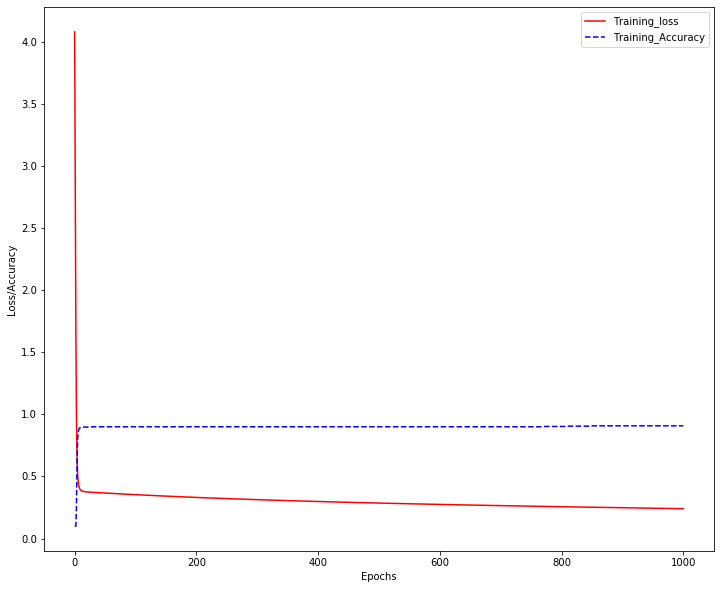

Epoch: 00000 - cost: 0.44806 - accuracy: 0.85500
Epoch: 01000 - cost: 0.22671 - accuracy: 0.92000



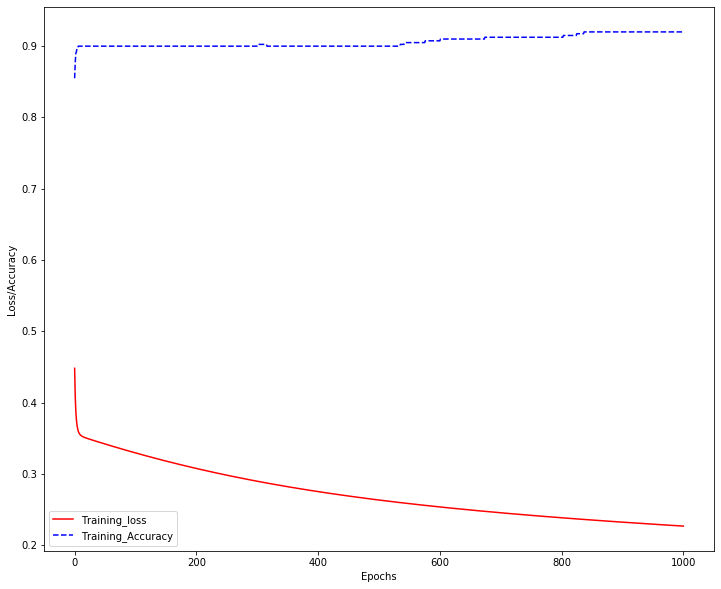

Epoch: 00000 - cost: 0.54229 - accuracy: 0.90000
Epoch: 01000 - cost: 0.18054 - accuracy: 0.93250



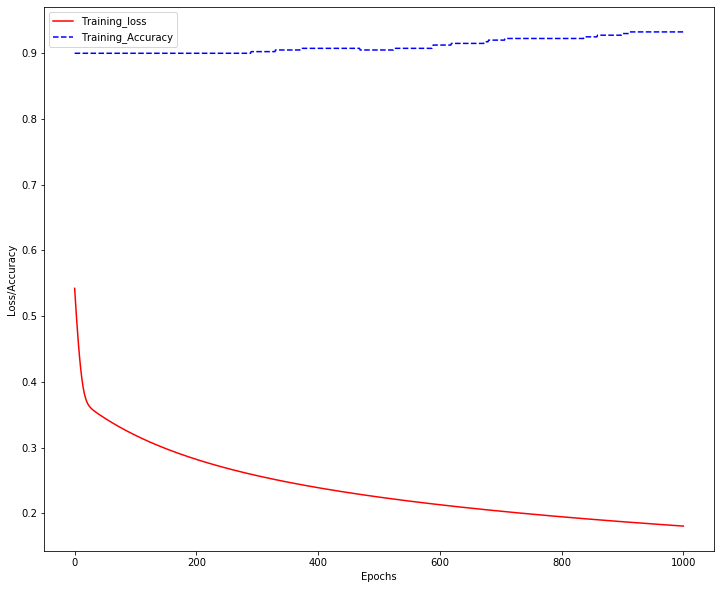

Epoch: 00000 - cost: 5.12734 - accuracy: 0.10000
Epoch: 01000 - cost: 0.21770 - accuracy: 0.91500



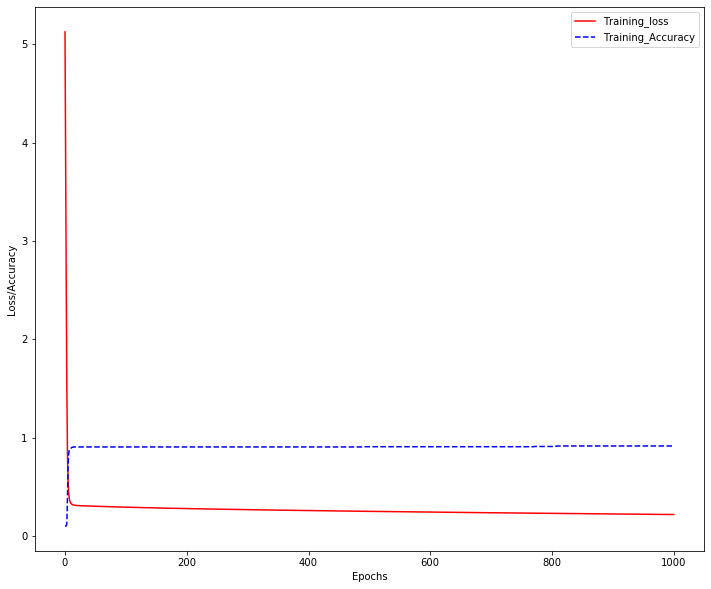

Epoch: 00000 - cost: 0.35252 - accuracy: 0.90000
Epoch: 01000 - cost: 0.15779 - accuracy: 0.94750



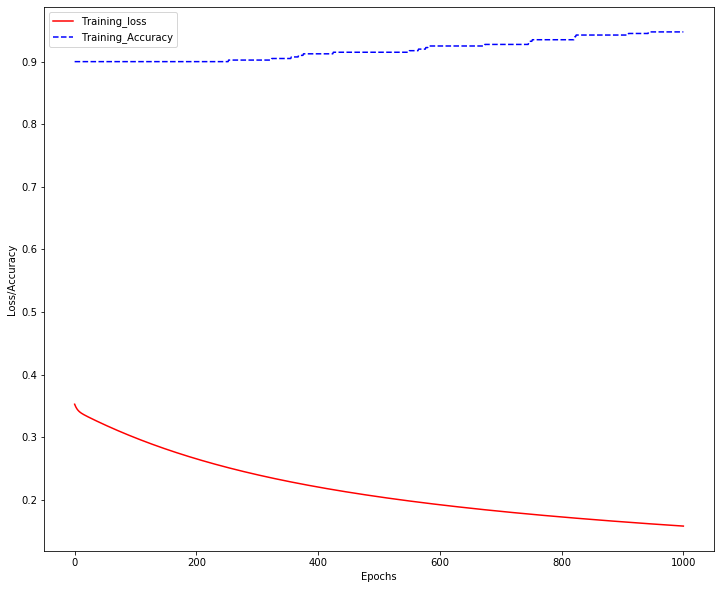


0.6021505376344086


In [236]:
%time
probabilities = []
training_images = np.array(training_images)
testing_images = np.array(testing_images)
X_train = training_images.reshape(training_images.shape[0], -1)
print(X_train.shape)
X_test = testing_images.reshape(testing_images.shape[0], -1)
for class_num in tqdm(range(10)):
    lag = 0
    flag = 0
    if class_num == 9:
        lag = 7
    if class_num == 8:
        flag = 7
    i = class_num
    training_y = [0]*len(training_indices)
    testing_y = [0]*len(testing_indices)
    starting_index1 = i*40 - lag
    end_index1 = i*40 - lag + 40
    starting_index2 = i*10 - lag
    end_index2 = i*10 - lag + 10 - flag
    training_y[starting_index1:end_index1] = [1]*(end_index1 - starting_index1)
    testing_y[starting_index2:end_index2] = [1]*(end_index2 - starting_index2)
    training_y = np.array(training_y)
    testing_y = np.array(testing_y)
    # Neural net
    net = NeuralNet(NN_ARCHITECTURE)
    net.fit(X_train, training_y, epochs=1001, learning_rate=3e-3, verbose=True, show_loss=True)
    prediction_probability = net.get_proba(X_test.T)
    probabilities.append(np.array(prediction_probability))

probabilities = np.array(probabilities)
predicted_class = np.argmax(probabilities, axis=0) 


# for first 8 class 10 images each, second la  st class have only 3 image and last class have 10 images
actual_class = [i for i in range(8) for j in range(10)] + [8]*3 + [9]*10
actual_class = np.array(actual_class)
num_testing = predicted_class.shape[1]
accuracy = np.sum(actual_class == predicted_class)/num_testing
print(accuracy)

Can also increase epoch for more accurate results but it takes longer to run, also can change learning rate to train faster.

#### Running same code for more epochs

Wall time: 0 ns
(400, 2500)


Epoch: 00000 - cost: 0.40839 - accuracy: 0.90000
Epoch: 01000 - cost: 0.13229 - accuracy: 0.95250
Epoch: 02000 - cost: 0.09158 - accuracy: 0.97500
Epoch: 03000 - cost: 0.07079 - accuracy: 0.98500
Epoch: 04000 - cost: 0.05730 - accuracy: 0.98750
Epoch: 05000 - cost: 0.04760 - accuracy: 0.99250



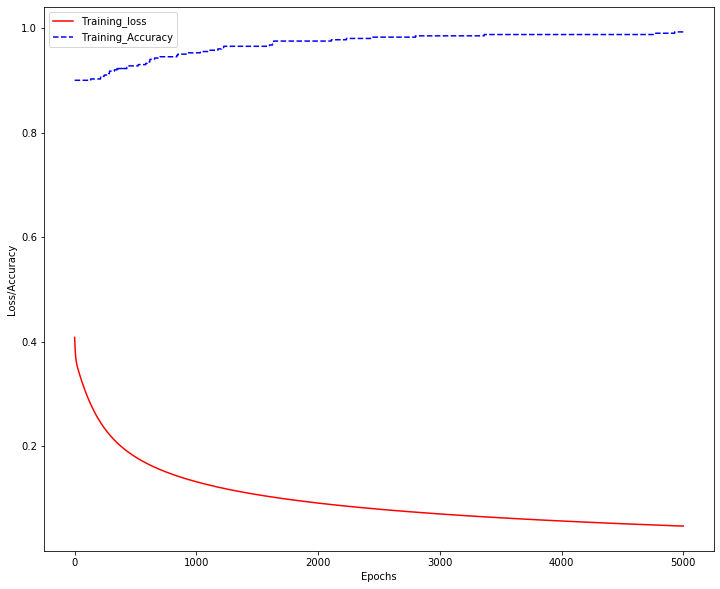

Epoch: 00000 - cost: 0.35976 - accuracy: 0.90000
Epoch: 01000 - cost: 0.18063 - accuracy: 0.92750
Epoch: 02000 - cost: 0.13049 - accuracy: 0.95500
Epoch: 03000 - cost: 0.10107 - accuracy: 0.97000
Epoch: 04000 - cost: 0.08148 - accuracy: 0.98000
Epoch: 05000 - cost: 0.06756 - accuracy: 0.98750



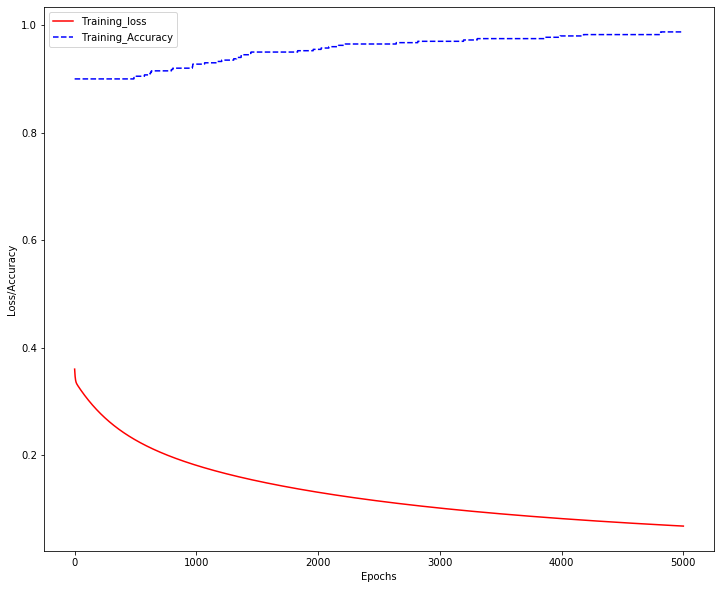

Epoch: 00000 - cost: 0.50084 - accuracy: 0.80500
Epoch: 01000 - cost: 0.21262 - accuracy: 0.91500
Epoch: 02000 - cost: 0.17520 - accuracy: 0.93750
Epoch: 03000 - cost: 0.15054 - accuracy: 0.94500
Epoch: 04000 - cost: 0.13175 - accuracy: 0.95750
Epoch: 05000 - cost: 0.11670 - accuracy: 0.96750



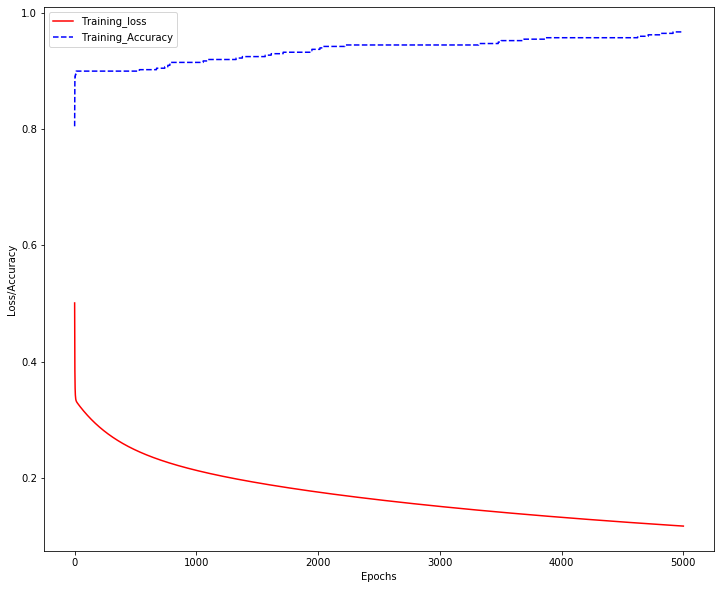

Epoch: 00000 - cost: 0.54887 - accuracy: 0.71500
Epoch: 01000 - cost: 0.22892 - accuracy: 0.91250
Epoch: 02000 - cost: 0.18389 - accuracy: 0.92500
Epoch: 03000 - cost: 0.15508 - accuracy: 0.94750
Epoch: 04000 - cost: 0.13339 - accuracy: 0.95250
Epoch: 05000 - cost: 0.11620 - accuracy: 0.95750



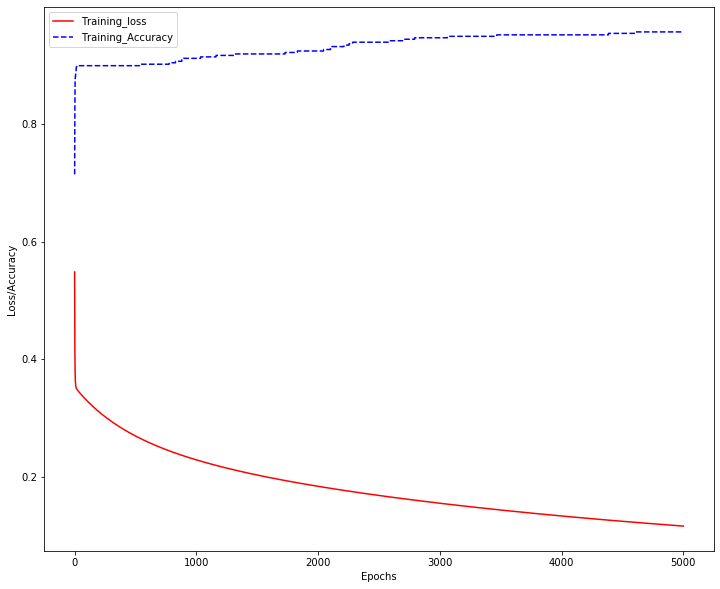

Epoch: 00000 - cost: 2.21484 - accuracy: 0.10000
Epoch: 01000 - cost: 0.21163 - accuracy: 0.92000
Epoch: 02000 - cost: 0.16135 - accuracy: 0.94500
Epoch: 03000 - cost: 0.13024 - accuracy: 0.95500
Epoch: 04000 - cost: 0.10817 - accuracy: 0.96750
Epoch: 05000 - cost: 0.09155 - accuracy: 0.97500



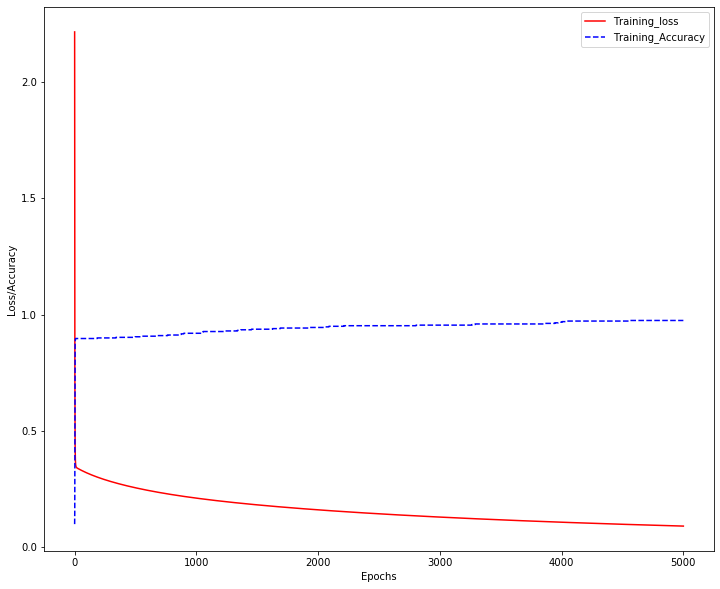

Epoch: 00000 - cost: 0.37407 - accuracy: 0.90000
Epoch: 01000 - cost: 0.22821 - accuracy: 0.90750
Epoch: 02000 - cost: 0.17319 - accuracy: 0.93000
Epoch: 03000 - cost: 0.14099 - accuracy: 0.94500
Epoch: 04000 - cost: 0.11876 - accuracy: 0.95250
Epoch: 05000 - cost: 0.10208 - accuracy: 0.96750



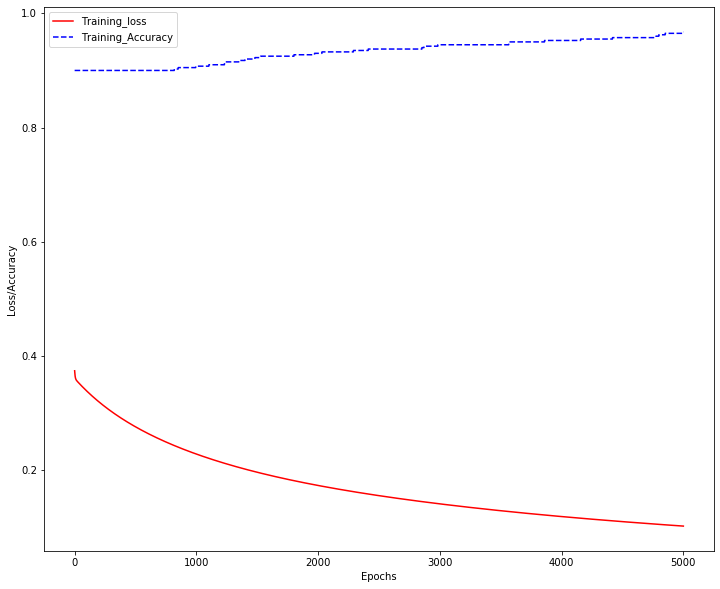

Epoch: 00000 - cost: 1.77198 - accuracy: 0.10000
Epoch: 01000 - cost: 0.22161 - accuracy: 0.92000
Epoch: 02000 - cost: 0.18719 - accuracy: 0.92500
Epoch: 03000 - cost: 0.16334 - accuracy: 0.94000
Epoch: 04000 - cost: 0.14432 - accuracy: 0.94750
Epoch: 05000 - cost: 0.12851 - accuracy: 0.95750



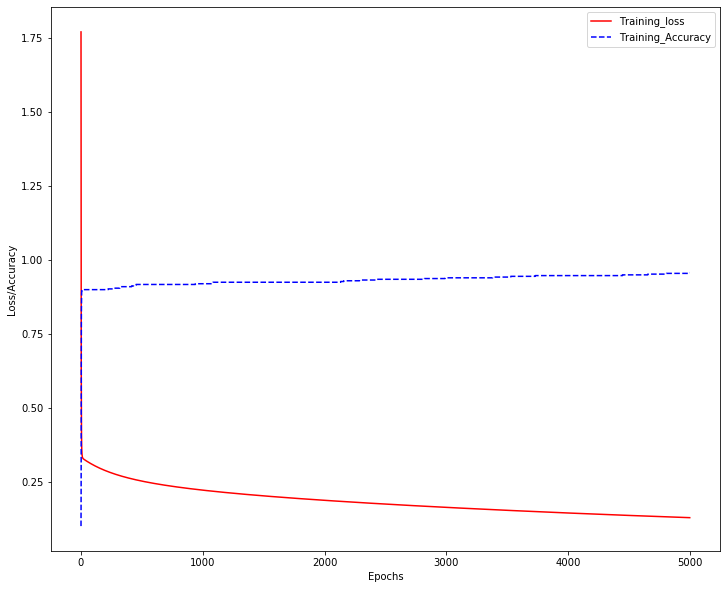

Epoch: 00000 - cost: 1.59263 - accuracy: 0.12250
Epoch: 01000 - cost: 0.19315 - accuracy: 0.93250
Epoch: 02000 - cost: 0.15042 - accuracy: 0.95000
Epoch: 03000 - cost: 0.12520 - accuracy: 0.96500
Epoch: 04000 - cost: 0.10736 - accuracy: 0.97250
Epoch: 05000 - cost: 0.09348 - accuracy: 0.98250



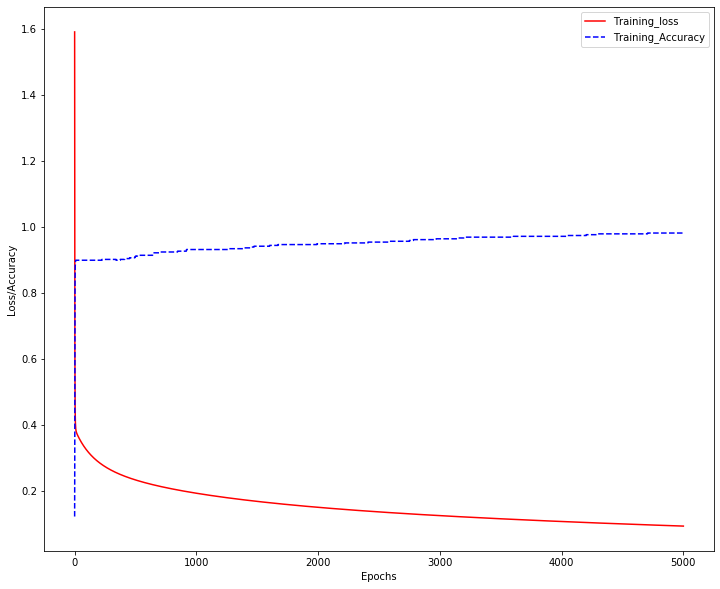

Epoch: 00000 - cost: 2.13369 - accuracy: 0.10000
Epoch: 01000 - cost: 0.22549 - accuracy: 0.91000
Epoch: 02000 - cost: 0.17951 - accuracy: 0.93250
Epoch: 03000 - cost: 0.15050 - accuracy: 0.94500
Epoch: 04000 - cost: 0.12929 - accuracy: 0.95250
Epoch: 05000 - cost: 0.11276 - accuracy: 0.96750



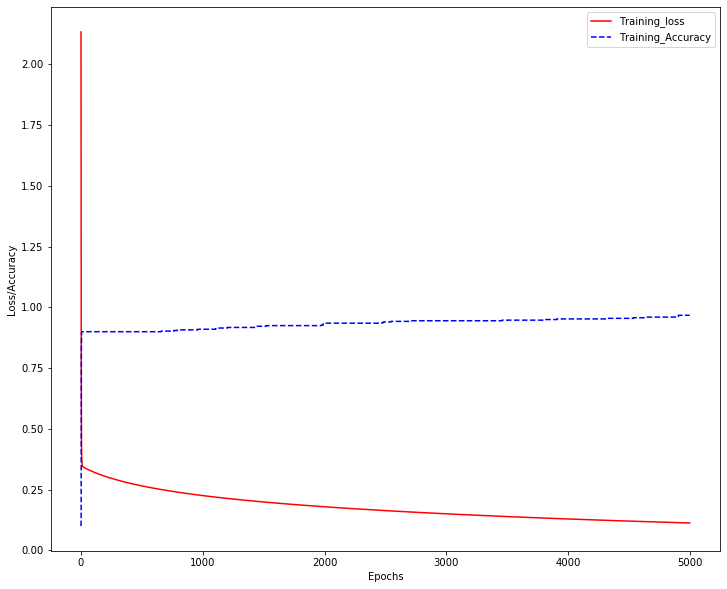

Epoch: 00000 - cost: 0.75146 - accuracy: 0.48000
Epoch: 01000 - cost: 0.16830 - accuracy: 0.94250
Epoch: 02000 - cost: 0.12336 - accuracy: 0.96250
Epoch: 03000 - cost: 0.09881 - accuracy: 0.97750
Epoch: 04000 - cost: 0.08222 - accuracy: 0.98250
Epoch: 05000 - cost: 0.07003 - accuracy: 0.98250



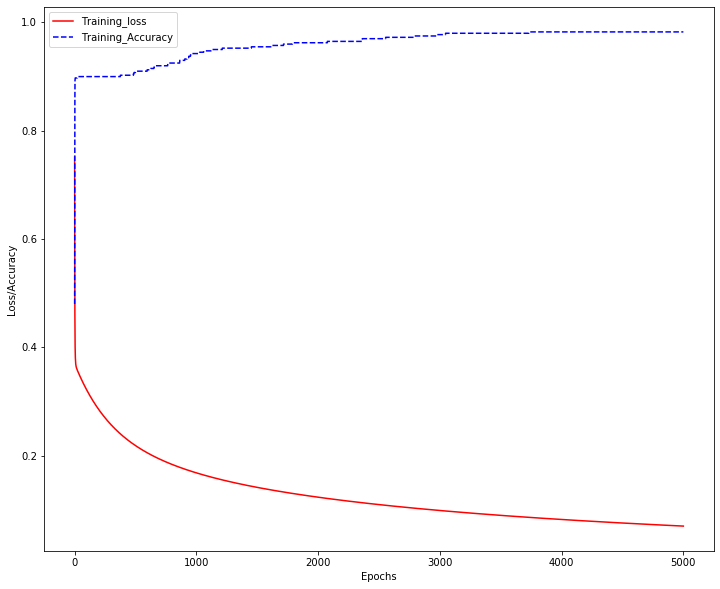


0.6236559139784946


In [237]:
%time
probabilities = []
training_images = np.array(training_images)
testing_images = np.array(testing_images)
X_train = training_images.reshape(training_images.shape[0], -1)
print(X_train.shape)
X_test = testing_images.reshape(testing_images.shape[0], -1)
for class_num in tqdm(range(10)):
    lag = 0
    flag = 0
    if class_num == 9:
        lag = 7
    if class_num == 8:
        flag = 7
    i = class_num
    training_y = [0]*len(training_indices)
    testing_y = [0]*len(testing_indices)
    starting_index1 = i*40 - lag
    end_index1 = i*40 - lag + 40
    starting_index2 = i*10 - lag
    end_index2 = i*10 - lag + 10 - flag
    training_y[starting_index1:end_index1] = [1]*(end_index1 - starting_index1)
    testing_y[starting_index2:end_index2] = [1]*(end_index2 - starting_index2)
    training_y = np.array(training_y)
    testing_y = np.array(testing_y)
    # Neural net
    net = NeuralNet(NN_ARCHITECTURE)
    net.fit(X_train, training_y, epochs=5001, learning_rate=3e-3, verbose=True, show_loss=True)
    prediction_probability = net.get_proba(X_test.T)
    probabilities.append(np.array(prediction_probability))

probabilities = np.array(probabilities)
predicted_class = np.argmax(probabilities, axis=0) 


# for first 8 class 10 images each, second last class have only 3 image and last class have 10 images
actual_class = [i for i in range(8) for j in range(10)] + [8]*3 + [9]*10
actual_class = np.array(actual_class)
num_testing = predicted_class.shape[1]
accuracy = np.sum(actual_class == predicted_class)/num_testing
print(accuracy)

In [239]:
print("Accuracy is ", accuracy)

Accuracy is  0.6236559139784946
